<h1 style="text-align:center; font-weight:bold; background:#f1f2f6; 
           padding:15px; border-radius:10px; color:#2f3542;">
    U-NET IMAGE SEGMENTATION
</h1>




Model: "simple_unet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 128, 128, 32)      │             896 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 128, 128, 32)      │           9,248 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 64, 64, 32)        │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 64, 64, 64)        │          18,496 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 64, 64, 64)        │          36,928 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 32, 32, 64)        │               0 │ conv2d_3[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 32, 32, 128)       │          73,856 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 32, 32, 128)       │         147,584 │ conv2d_4[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_transpose              │ (None, 64, 64, 64)        │          32,832 │ conv2d_5[0][0]             │
│ (Conv2DTranspose)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 64, 64, 128)       │               0 │ conv2d_transpose[0][0],    │
│                               │                           │                 │ conv2d_3[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 64, 64, 64)        │          73,792 │ concatenate[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_7 (Conv2D)             │ (None, 64, 64, 64)        │          36,928 │ conv2d_6[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_transpose_1            │ (None, 128, 128, 32)      │           8,224 │ conv2d_7[0][0]             │
│ (Conv2DTranspose)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_1 (Concatenate)   │ (None, 128, 128, 64)      │               0 │ conv2d_transpose_1[0][0],  │
│                               │                           │               

 Total params: 466,529 (1.78 MB)

 Trainable params: 466,529 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

Input batch shape: (1, 128, 128, 3)


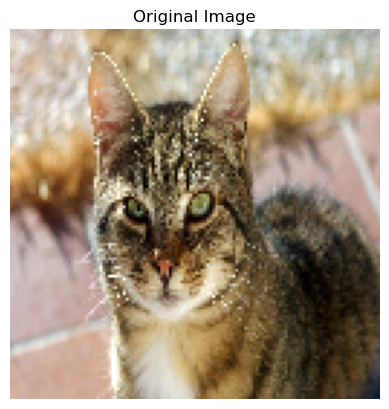

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
Predicted mask shape: (1, 128, 128, 1)
Binary mask shape: (128, 128, 1)


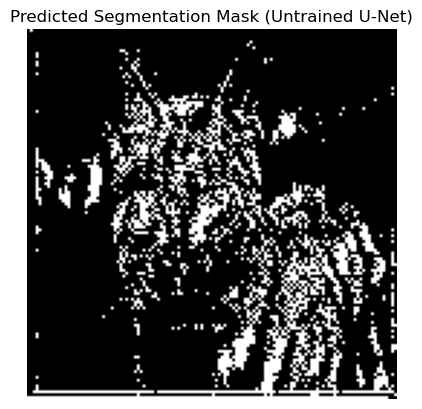

In [1]:
# Step 1: Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt

# Step 2: Set image path and basic parameters
image_path = r"C:\Users\Dell\Downloads\A-Cat.jpg"

img_height = 128
img_width = 128
img_channels = 3
input_shape = (img_height, img_width, img_channels)

# Step 3: Define a small double conv block for U-Net
def double_conv_block(x, n_filters):
    x = layers.Conv2D(n_filters, kernel_size=3, padding="same", activation="relu")(x)
    x = layers.Conv2D(n_filters, kernel_size=3, padding="same", activation="relu")(x)
    return x

# Step 4: Build a very small U-Net model
def build_unet(input_shape):
    inputs = keras.Input(shape=input_shape)

    # Encoder
    x1 = double_conv_block(inputs, 32)
    p1 = layers.MaxPool2D(pool_size=(2, 2))(x1)

    x2 = double_conv_block(p1, 64)
    p2 = layers.MaxPool2D(pool_size=(2, 2))(x2)

    # Bottleneck
    b = double_conv_block(p2, 128)

    # Decoder
    u1 = layers.Conv2DTranspose(64, kernel_size=2, strides=2, padding="same")(b)
    c1 = layers.Concatenate()([u1, x2])
    x3 = double_conv_block(c1, 64)

    u2 = layers.Conv2DTranspose(32, kernel_size=2, strides=2, padding="same")(x3)
    c2 = layers.Concatenate()([u2, x1])
    x4 = double_conv_block(c2, 32)

    # Output layer
    outputs = layers.Conv2D(1, kernel_size=1, activation="sigmoid")(x4)

    model = keras.Model(inputs=inputs, outputs=outputs, name="simple_unet")
    return model

# Step 5: Create and compile the model
model = build_unet(input_shape)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

# Step 6: Load and preprocess the cat image
cat_img = load_img(image_path, target_size=(img_height, img_width), color_mode="rgb")
cat_img_array = img_to_array(cat_img)
cat_img_array_original = cat_img_array.copy()
cat_img_array = cat_img_array / 255.0
cat_img_batch = np.expand_dims(cat_img_array, axis=0)
print("Input batch shape:", cat_img_batch.shape)

# Step 7: Show the original image
plt.figure()
plt.title("Original Image")
plt.imshow(cat_img_array_original.astype("float32") / 255.0)
plt.axis("off")
plt.show()

# Step 8: Run the (untrained) U-Net to get a segmentation mask
pred_mask = model.predict(cat_img_batch)
print("Predicted mask shape:", pred_mask.shape)

pred_mask = np.squeeze(pred_mask, axis=0)
pred_mask = np.squeeze(pred_mask, axis=-1)

binary_mask = (pred_mask > 0.5).astype("float32")
binary_mask_3d = np.expand_dims(binary_mask, axis=-1)
print("Binary mask shape:", binary_mask_3d.shape)

# Step 9: Show the predicted segmentation mask
plt.figure()
plt.title("Predicted Segmentation Mask (Untrained U-Net)")
plt.imshow(binary_mask, cmap="gray")
plt.axis("off")
plt.show()
